In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
csv_path = "C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data/*.csv"

In [5]:
# Load all CSV files
import glob
csv_files = glob.glob(csv_path)
print(f"Found {len(csv_files)} CSV files: ")
for file in csv_files:
    print(file)

Found 6 CSV files: 
C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data\2020VAERSDATA.csv
C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data\2021VAERSDATA.csv
C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data\2022VAERSDATA.csv
C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data\2023VAERSDATA.csv
C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data\2024VAERSDATA.csv
C:/Users/moham/OneDrive/Documents/GitHub/ADEGuard/data/raw/year_data\2025VAERSDATA.csv


In [6]:
# Read all CSV files into a list of DataFrames
if not csv_files:
    print("No CSV files found. Please check the path or file pattern.")
    dfs = []
else:
    dfs = []
    for file in csv_files:
        try:
            df = pd.read_csv(file, encoding="latin1")
            dfs.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

C:\Users\moham\AppData\Local\Temp\ipykernel_7076\1638147766.py:9: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding="latin1")
C:\Users\moham\AppData\Local\Temp\ipykernel_7076\1638147766.py:9: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding="latin1")
C:\Users\moham\AppData\Local\Temp\ipykernel_7076\1638147766.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding="latin1")


In [7]:
# Merge Strategy 1: Concatenate (stack) if CSVs have the same structure
merged_df = pd.concat(dfs, ignore_index=True)

In [8]:
# Check the merged DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250586 entries, 0 to 1250585
Data columns (total 36 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1250586 non-null  int64  
 1   RECVDATE      1250586 non-null  object 
 2   STATE         1043638 non-null  object 
 3   AGE_YRS       1085682 non-null  float64
 4   CAGE_YR       969625 non-null   float64
 5   CAGE_MO       23681 non-null    float64
 6   SEX           1248653 non-null  object 
 7   RPT_DATE      2467 non-null     object 
 8   SYMPTOM_TEXT  1248537 non-null  object 
 9   DIED          21682 non-null    object 
 10  DATEDIED      18965 non-null    object 
 11  L_THREAT      18481 non-null    object 
 12  ER_VISIT      421 non-null      object 
 13  HOSPITAL      101760 non-null   object 
 14  HOSPDAYS      60271 non-null    float64
 15  X_STAY        657 non-null      object 
 16  DISABLE       24165 non-null    object 
 17  RECOVD        1098684 non-n

In [9]:
merged_df.isnull().sum()

VAERS_ID              0
RECVDATE              0
STATE            206948
AGE_YRS          164904
CAGE_YR          280961
CAGE_MO         1226905
SEX                1933
RPT_DATE        1248119
SYMPTOM_TEXT       2049
DIED            1228904
DATEDIED        1231621
L_THREAT        1232105
ER_VISIT        1250165
HOSPITAL        1148826
HOSPDAYS        1190315
X_STAY          1249929
DISABLE         1226421
RECOVD           151902
VAX_DATE         115057
ONSET_DATE       144087
NUMDAYS          195533
LAB_DATA         872993
V_ADMINBY             0
V_FUNDBY        1247933
OTHER_MEDS       692168
CUR_ILL          927099
HISTORY          681261
PRIOR_VAX       1194631
SPLTTYPE         836023
FORM_VERS             0
TODAYS_DATE       14184
BIRTH_DEFECT    1249851
OFC_VISIT       1006130
ER_ED_VISIT     1109804
ALLERGIES        800082
ORDER                 0
dtype: int64

In [10]:
merged_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,fibromyalgia; arthritis,72; intense pain;12/7/18/Fluzone High-Dose/San...,NaN,2,01/01/2020,NaN,NaN,NaN,Latex,2
1,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,Migraines,NaN,NaN,2,01/01/2020,NaN,NaN,NaN,Morphine,1
2,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,"Hypothyroidism, Meniere's Disease.",NaN,NaN,2,01/01/2020,NaN,Y,Y,"Penicillin, sulfa drugs, erythromycin, tetracy...",1
3,855019,01/01/2020,NaN,50.0,50.0,NaN,F,NaN,SORENESS IN THE AREA. ITCHING AND RASH,NaN,...,NaN,NaN,NaN,2,01/01/2020,NaN,NaN,NaN,NaN,1
4,855020,01/01/2020,TX,67.0,67.0,NaN,F,NaN,"sore arm, fever 101 , chills, and aching musc...",NaN,...,none,NaN,NaN,2,01/01/2020,NaN,NaN,NaN,"morphine,",1


In [11]:
merged_df.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS,ORDER
count,1.250586e+06,1.085682e+06,969625.000000,23681.000000,60271.000000,1.055053e+06,1.250586e+06,1.250586e+06
mean,1.764490e+06,4.879873e+01,48.408740,0.334872,10.183687,4.314806e+01,1.997879e+00,1.022556e+00
std,6.046690e+05,2.171627e+01,22.023924,0.275244,579.882451,6.125758e+02,4.600986e-02,1.632180e-01
min,1.091280e+05,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.219157e+06,3.300000e+01,32.000000,0.100000,2.000000,0.000000e+00,2.000000e+00,1.000000e+00
50%,1.682746e+06,5.100000e+01,51.000000,0.300000,4.000000,1.000000e+00,2.000000e+00,1.000000e+00
75%,2.313166e+06,6.600000e+01,66.000000,0.500000,7.000000,7.000000e+00,2.000000e+00,1.000000e+00
max,2.851140e+06,1.190000e+02,120.000000,1.000000,99999.000000,6.610800e+04,2.000000e+00,1.000000e+01


In [12]:
# Visualize Distributions (e.g., for numerical columns)
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['VAERS_ID', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'HOSPDAYS', 'NUMDAYS',
       'FORM_VERS', 'ORDER'],
      dtype='object')

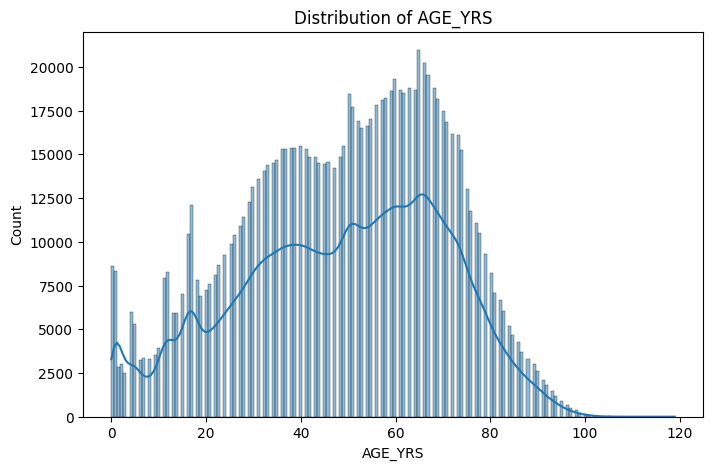

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['AGE_YRS'], kde=True)
plt.title(f"Distribution of AGE_YRS")
plt.xlabel('AGE_YRS')
plt.ylabel("Count")
plt.show()

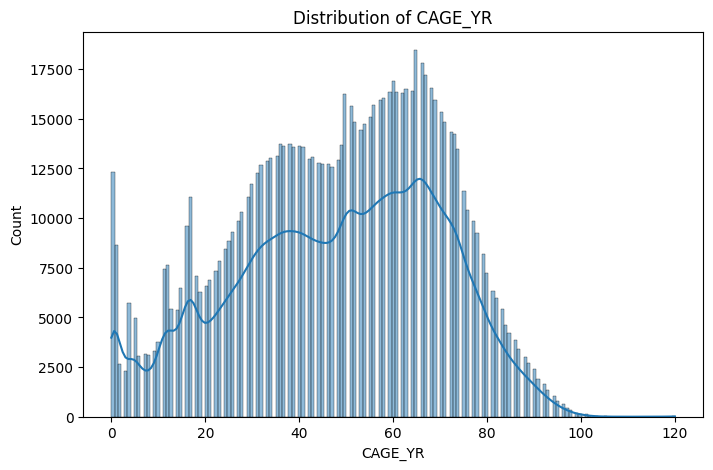

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['CAGE_YR'], kde=True)
plt.title(f"Distribution of CAGE_YR")
plt.xlabel('CAGE_YR')
plt.ylabel("Count")
plt.show()

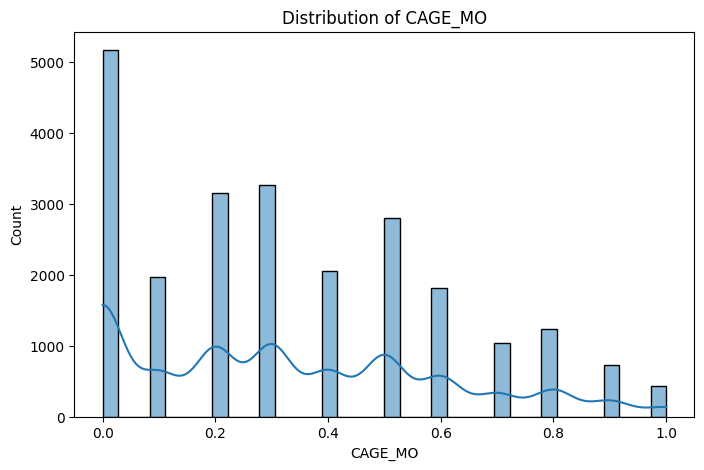

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['CAGE_MO'], kde=True)
plt.title(f"Distribution of CAGE_MO")
plt.xlabel('CAGE_MO')
plt.ylabel("Count")
plt.show()

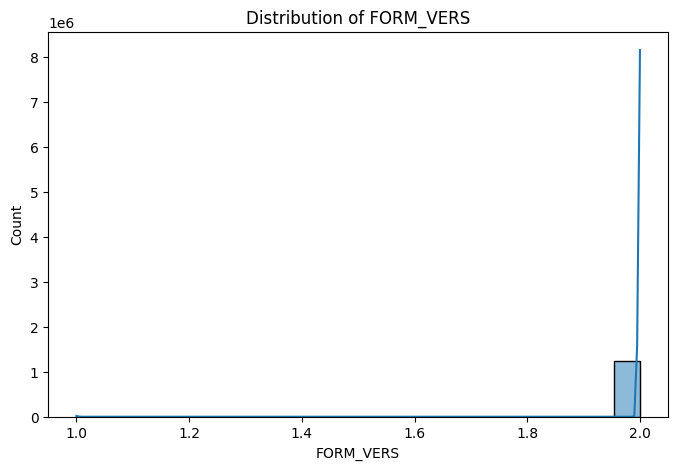

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['FORM_VERS'], kde=True)
plt.title(f"Distribution of FORM_VERS")
plt.xlabel('FORM_VERS')
plt.ylabel("Count")
plt.show()

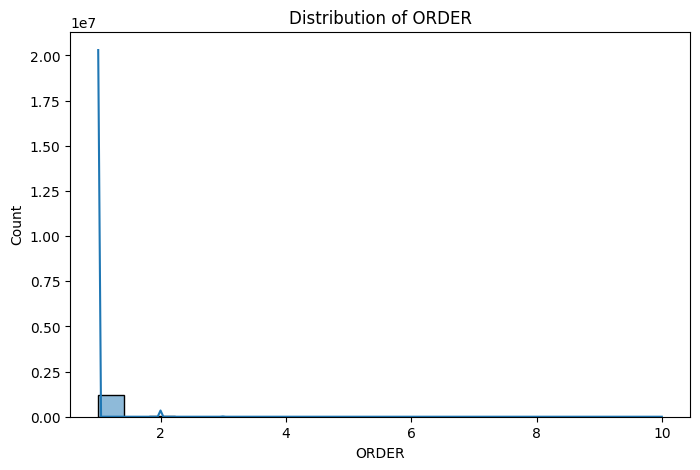

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['ORDER'], kde=True)
plt.title(f"Distribution of ORDER")
plt.xlabel('ORDER')
plt.ylabel("Count")
plt.show()

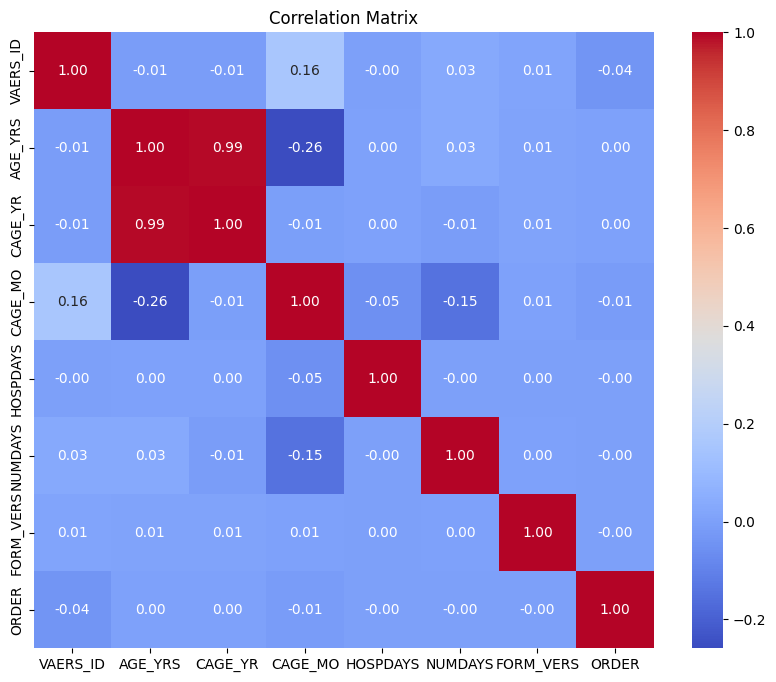

In [19]:
# 5. Correlation Matrix (for numerical columns)
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [20]:
# 6. Categorical Data (if any)
categorical_cols = merged_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['RECVDATE', 'STATE', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED',
       'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'X_STAY', 'DISABLE',
       'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES'],
      dtype='object')

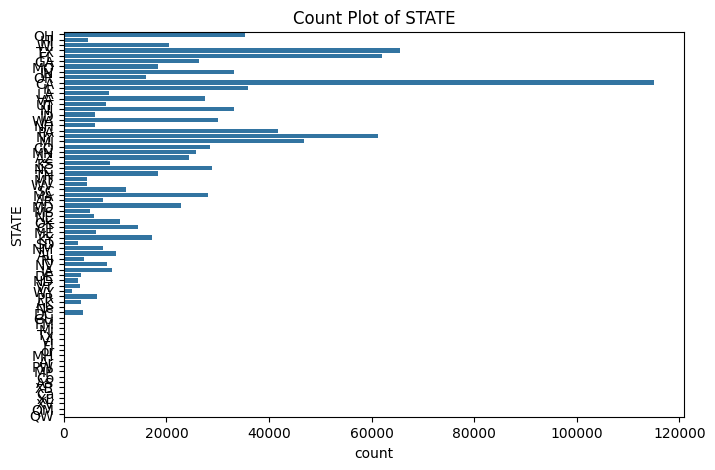

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(y=merged_df['STATE'])
plt.title(f"Count Plot of STATE")
plt.show()


Value Counts for RECVDATE (Top 10):
RECVDATE
08/22/2021    14623
08/15/2021    12216
08/21/2021    10765
08/28/2021    10056
04/13/2021     5974
02/26/2022     5387
04/16/2021     4840
08/23/2021     4789
04/14/2021     4698
04/09/2021     4306
Name: count, dtype: int64


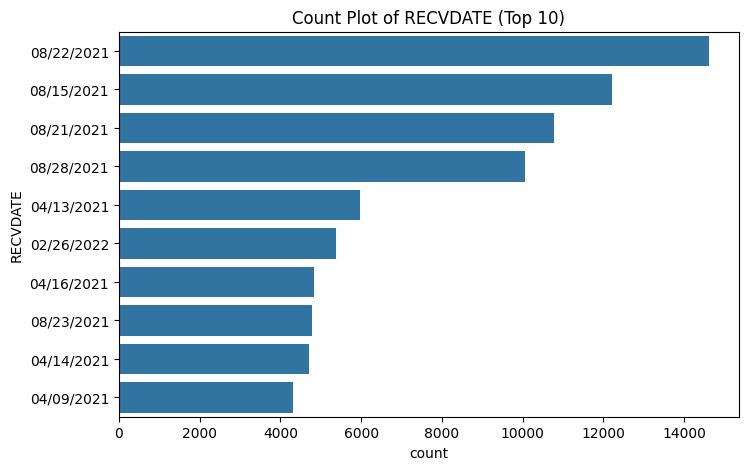


Value Counts for STATE (Top 10):
STATE
CA    115142
TX     65517
FL     62098
NY     61181
MI     46728
PA     41692
IL     35805
OH     35288
IN     33206
NJ     33108
Name: count, dtype: int64


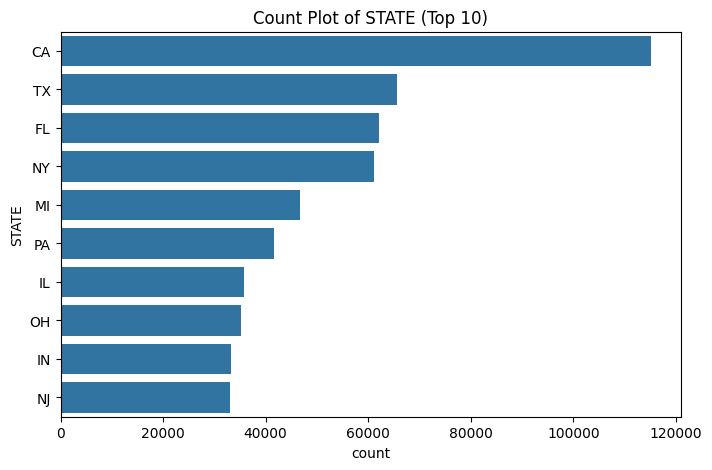


Value Counts for SEX (Top 10):
SEX
F    770278
M    397176
U     81199
Name: count, dtype: int64


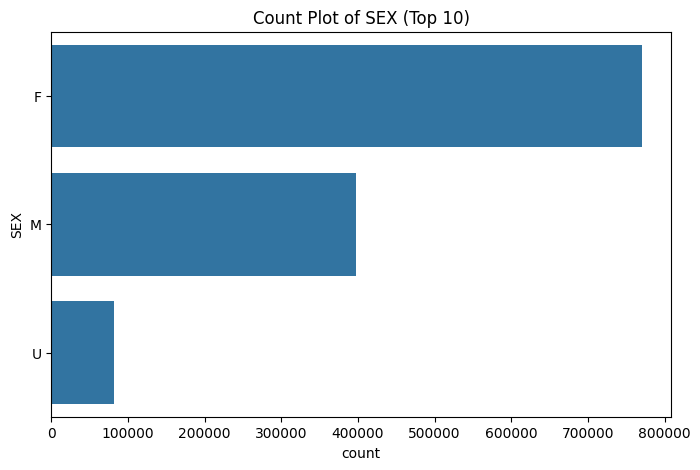


Value Counts for RPT_DATE (Top 10):
RPT_DATE
12/22/2020    55
02/05/2021    39
08/16/2021    35
12/21/2020    34
12/18/2020    32
02/04/2021    27
12/17/2020    25
03/15/2022    25
01/27/2021    25
12/23/2020    24
Name: count, dtype: int64


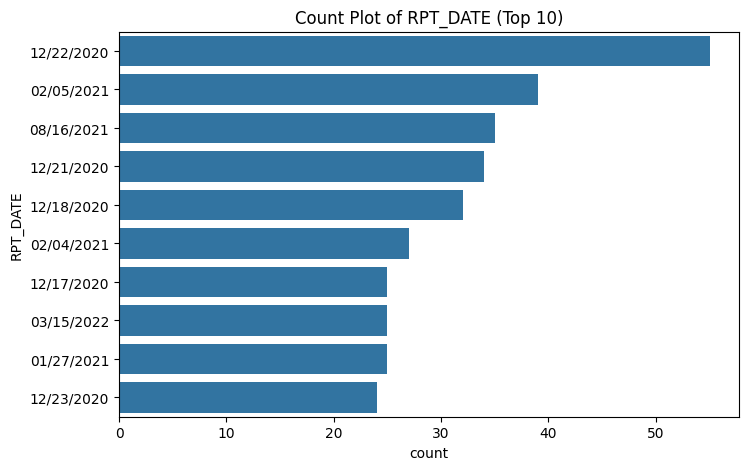


Value Counts for SYMPTOM_TEXT (Top 10):
SYMPTOM_TEXT
Error: Improper Storage (temperature)-                                3051
Error: Improper Storage (ex. temp./location)-                         2907
None stated.                                                          2334
VACCINE WAS STORED IN AS UNAPPROVED STORAGE UNIT                      1903
Narrative:                                                            1727
VACCINE WAS STORED IN AN UNAPPROVED STORAGE UNIT                      1628
Administration error mixed series mRNA vaccine Pfizer and Moderna.    1122
none                                                                   923
Administration error mixed series mRNA vaccine Pfizer and Moderna      861
Error: Improper Storage (temperature)                                  837
Name: count, dtype: int64


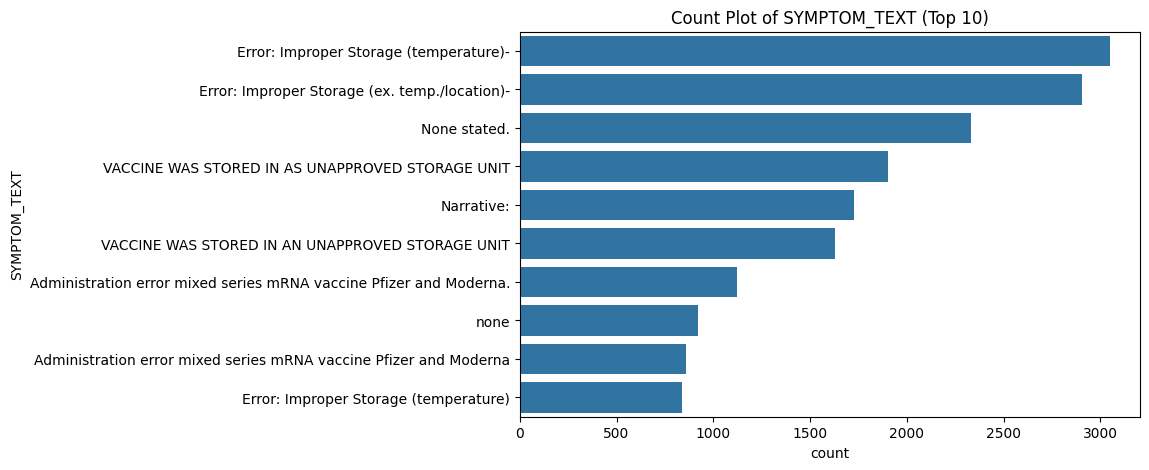


Value Counts for DIED (Top 10):
DIED
Y    21682
Name: count, dtype: int64


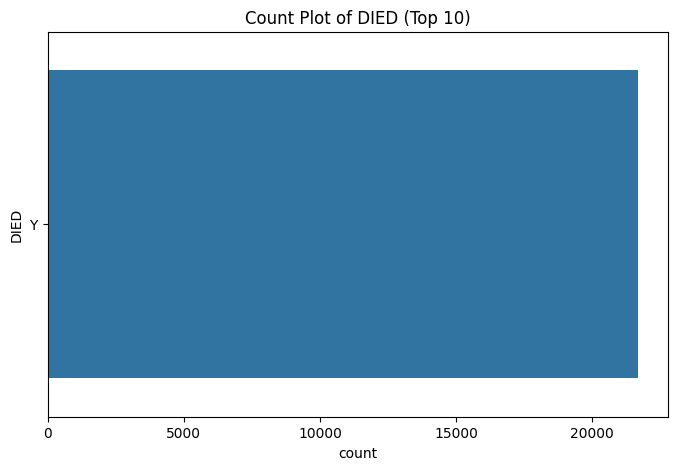


Value Counts for DATEDIED (Top 10):
DATEDIED
04/01/2021    87
05/01/2021    70
04/12/2021    70
04/06/2021    69
02/12/2021    68
03/19/2021    65
03/05/2021    65
09/01/2021    64
04/08/2021    63
03/21/2021    62
Name: count, dtype: int64


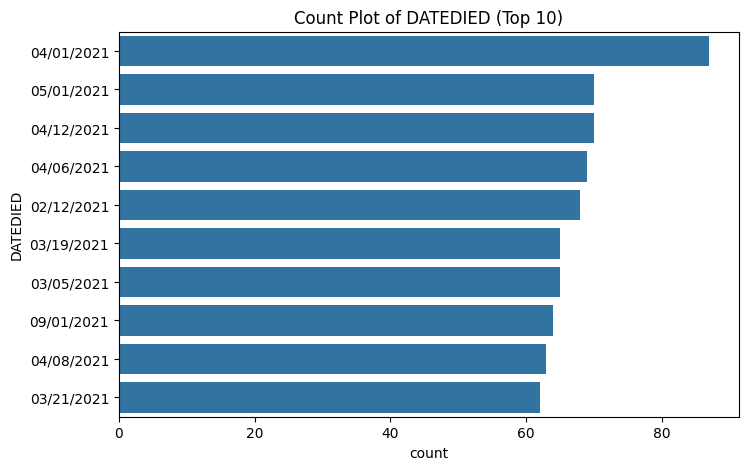


Value Counts for L_THREAT (Top 10):
L_THREAT
Y    18481
Name: count, dtype: int64


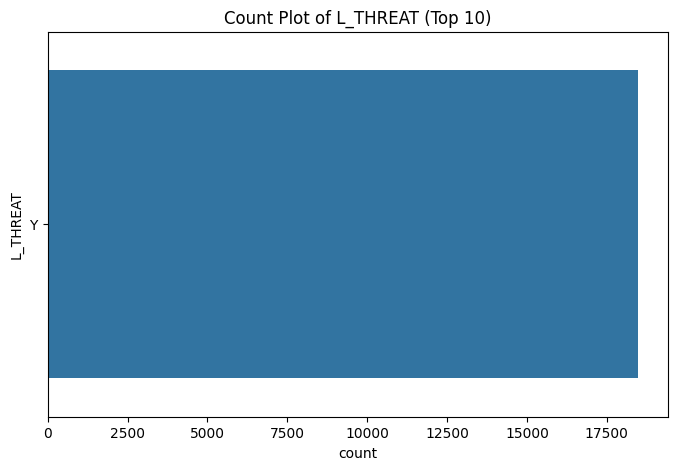


Value Counts for ER_VISIT (Top 10):
ER_VISIT
Y    421
Name: count, dtype: int64


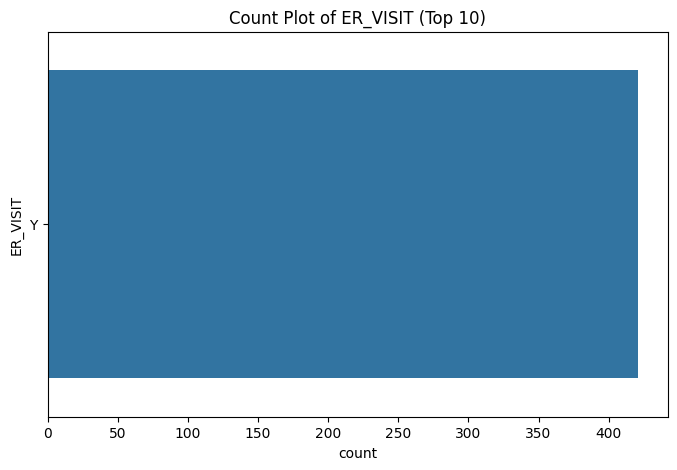


Value Counts for HOSPITAL (Top 10):
HOSPITAL
Y    101760
Name: count, dtype: int64


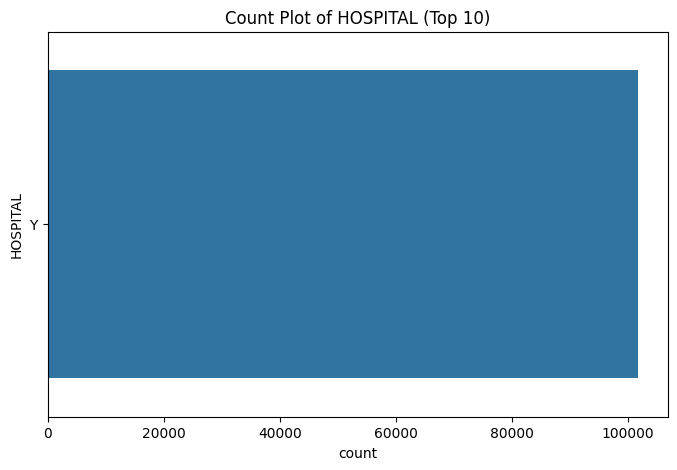


Value Counts for X_STAY (Top 10):
X_STAY
Y    657
Name: count, dtype: int64


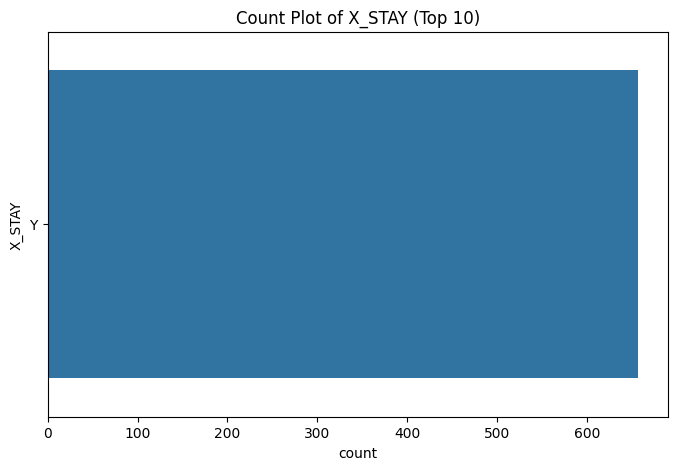


Value Counts for DISABLE (Top 10):
DISABLE
Y    24165
Name: count, dtype: int64


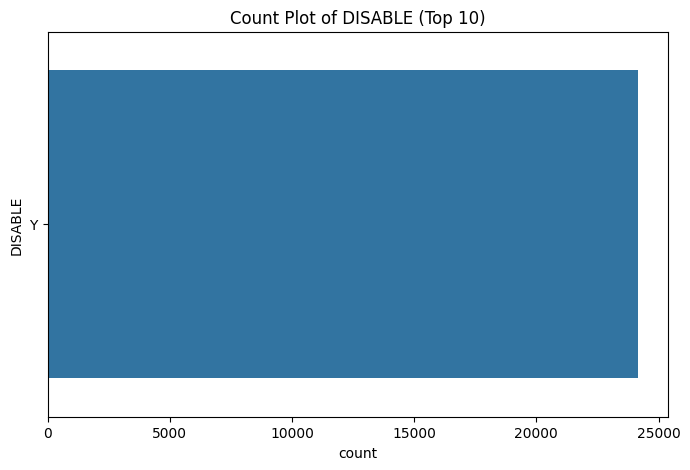


Value Counts for RECOVD (Top 10):
RECOVD
N    379556
Y    371771
U    347357
Name: count, dtype: int64


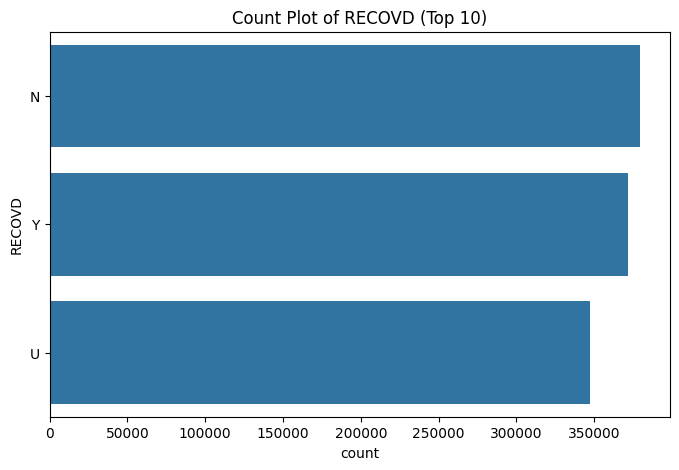


Value Counts for VAX_DATE (Top 10):
VAX_DATE
04/01/2021    10702
04/08/2021     7976
03/01/2021     7753
04/07/2021     7589
04/09/2021     7451
04/06/2021     6951
02/01/2021     6760
03/31/2021     6517
03/12/2021     6467
03/11/2021     6439
Name: count, dtype: int64


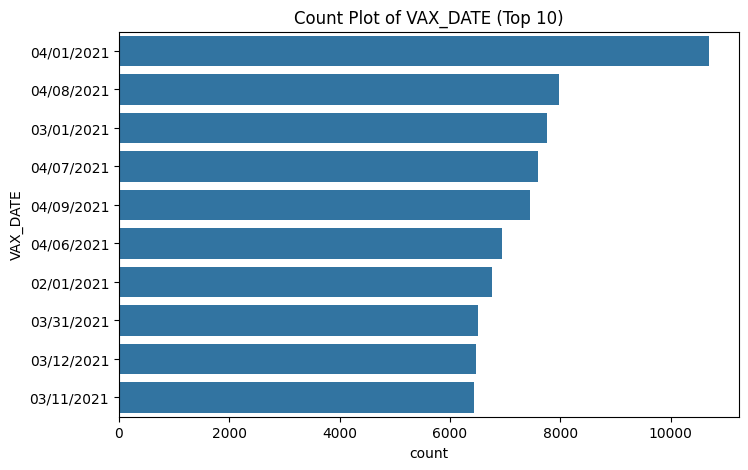


Value Counts for ONSET_DATE (Top 10):
ONSET_DATE
04/01/2021    11699
03/01/2021     9422
04/08/2021     6692
04/09/2021     6660
02/01/2021     6335
04/07/2021     6177
05/01/2021     6130
04/10/2021     5398
04/02/2021     5368
04/06/2021     5265
Name: count, dtype: int64


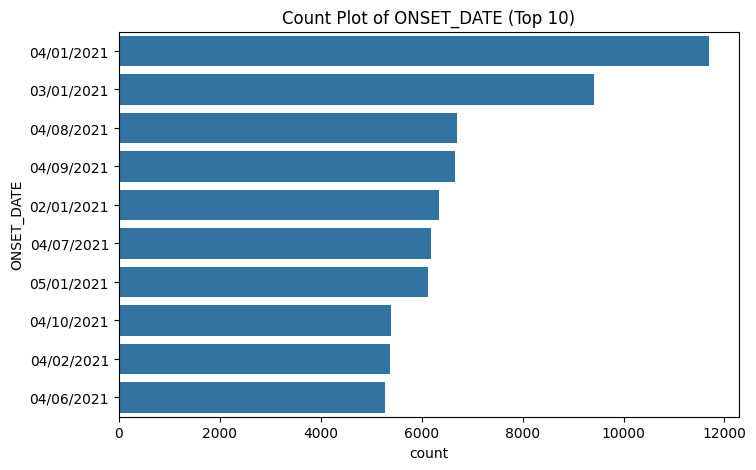


Value Counts for LAB_DATA (Top 10):
LAB_DATA
none       43579
None.       6809
NONE        6521
No          3096
no          2767
unknown     2598
Unknown     2203
N/a         1968
na          1795
COVID +     1790
Name: count, dtype: int64


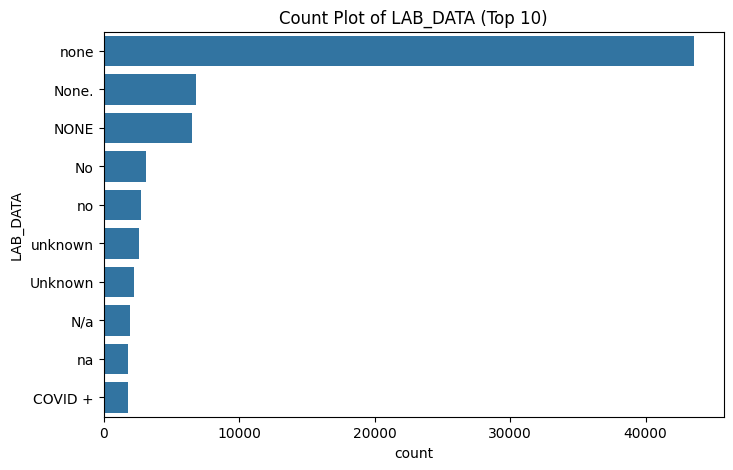


Value Counts for V_ADMINBY (Top 10):
V_ADMINBY
UNK    404672
PVT    270961
PHM    260945
OTH    145241
PUB     96353
WRK     30541
SEN     16133
SCH     12886
MIL     12854
Name: count, dtype: int64


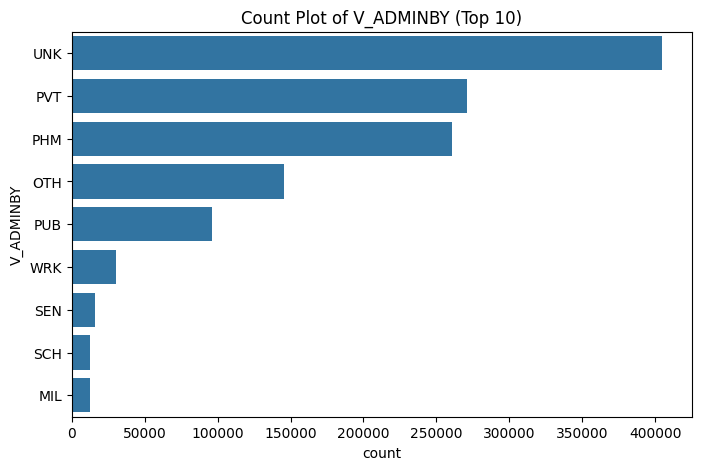


Value Counts for V_FUNDBY (Top 10):
V_FUNDBY
OTH    1102
PVT     551
PUB     507
UNK     468
MIL      25
Name: count, dtype: int64


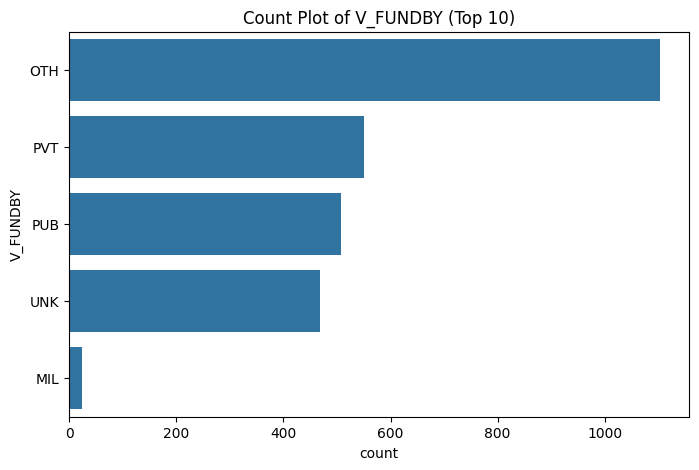


Value Counts for OTHER_MEDS (Top 10):
OTHER_MEDS
none            29262
unknown         13268
Unknown         11239
NONE             5668
No               4821
UNKNOWN          3046
no               2970
None.            2608
HUMIRA           2166
Multivitamin     1350
Name: count, dtype: int64


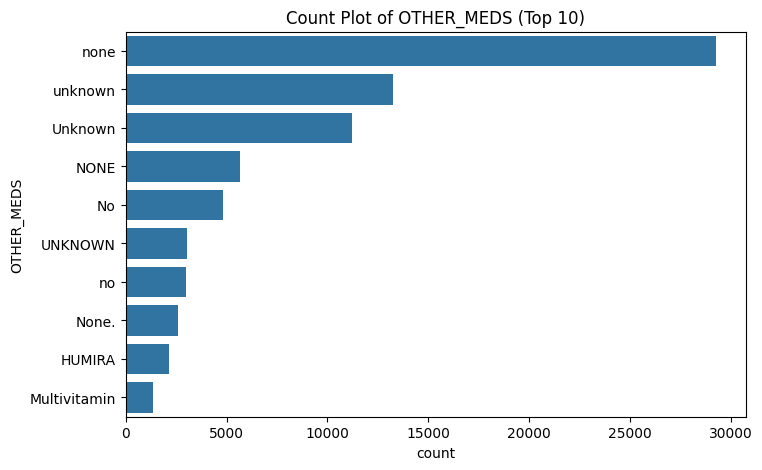


Value Counts for CUR_ILL (Top 10):
CUR_ILL
none          82135
No            19308
NONE          11488
unknown       10742
no            10612
Unknown        9524
None.          7730
N/a            2666
UNKNOWN        2401
None known     2126
Name: count, dtype: int64


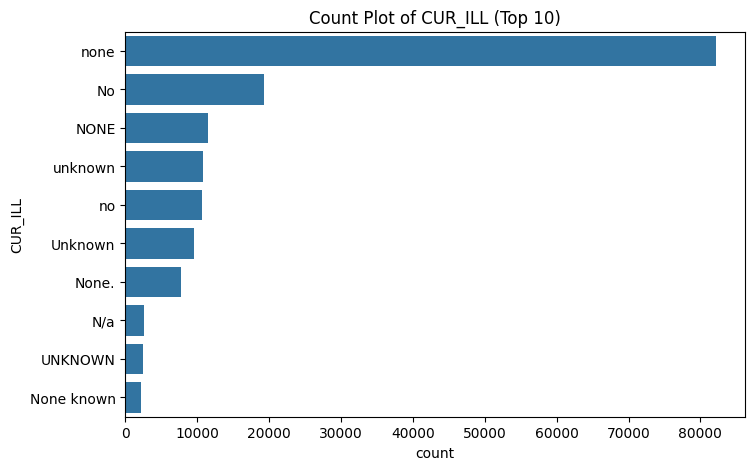


Value Counts for HISTORY (Top 10):
HISTORY
none                                                                                              44057
No                                                                                                10445
Asthma                                                                                             8640
unknown                                                                                            7915
Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None     7723
NONE                                                                                               7293
Unknown                                                                                            7283
Comments: Unknown                                                                                  7255
no                                                                                                 5963
Medical History/Conc

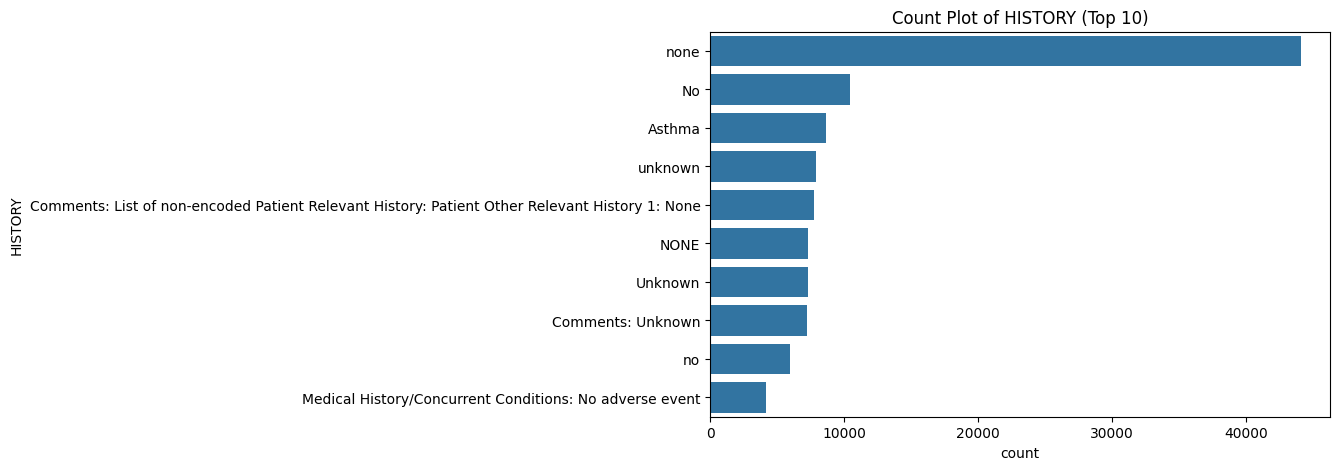


Value Counts for PRIOR_VAX (Top 10):
PRIOR_VAX
Flu shot       276
Flu vaccine    235
Flu            228
Moderna        193
Shingles       181
Shingrix       159
Influenza      138
Tetanus        121
unknown         98
yes             94
Name: count, dtype: int64


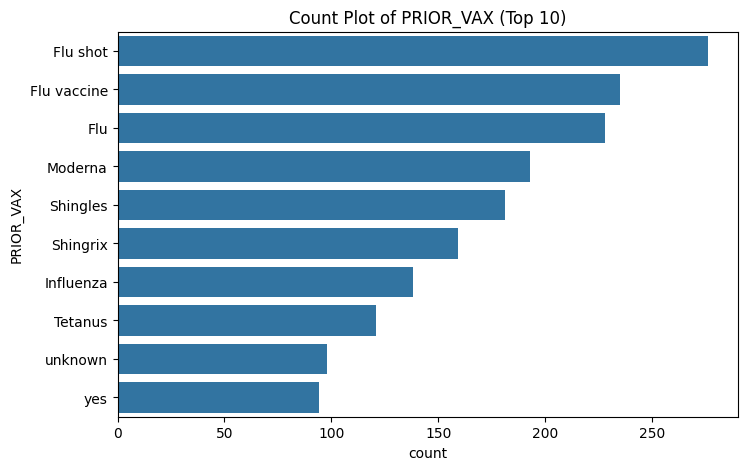


Value Counts for SPLTTYPE (Top 10):
SPLTTYPE
USMODERNATX, INC.MOD20210    51710
vsafe                        40698
USMODERNATX, INC.MOD20212    13846
USMODERNATX, INC.MOD20213    13232
USMODERNATX, INC.MOD20225    11258
USMODERNATX, INC.MOD20211     9279
USMODERNATX, INC.MOD20226     9174
USMODERNATX, INC.MOD20237     6186
USGLAXOSMITHKLINEUS2021AM     5352
USMODERNATX, INC.MOD20214     4729
Name: count, dtype: int64


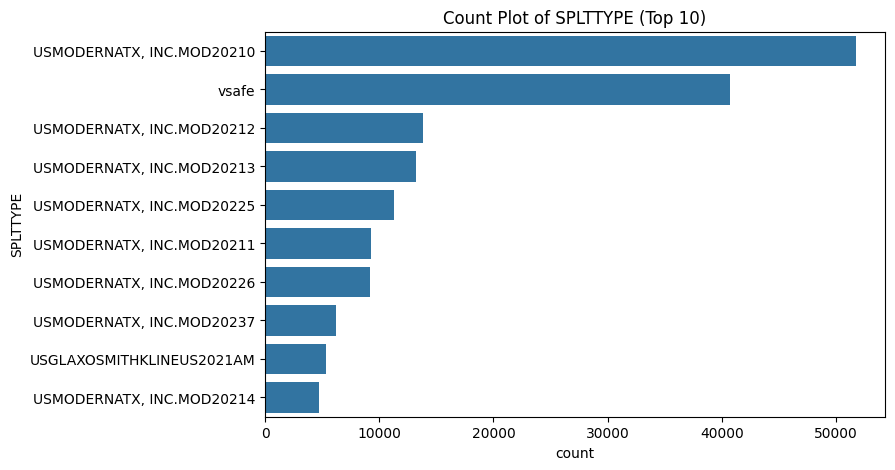


Value Counts for TODAYS_DATE (Top 10):
TODAYS_DATE
08/12/2021    14285
08/11/2021    12175
08/13/2021     8412
08/17/2021     8305
08/10/2021     8135
04/13/2021     6048
08/16/2021     5637
04/14/2021     5053
08/14/2021     4993
08/09/2021     4873
Name: count, dtype: int64


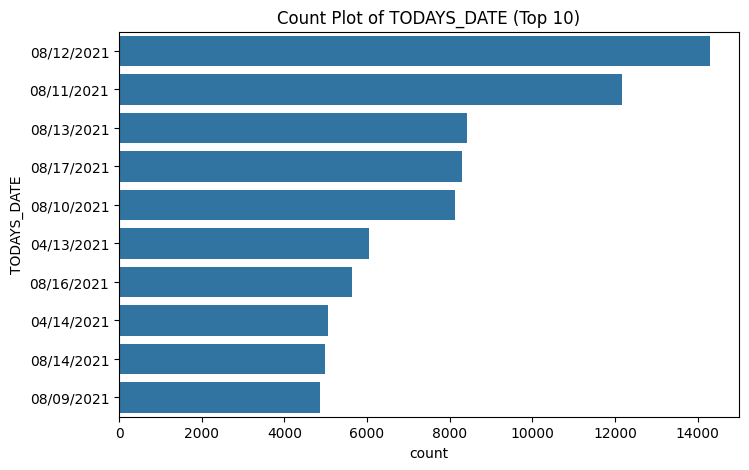


Value Counts for BIRTH_DEFECT (Top 10):
BIRTH_DEFECT
Y    735
Name: count, dtype: int64


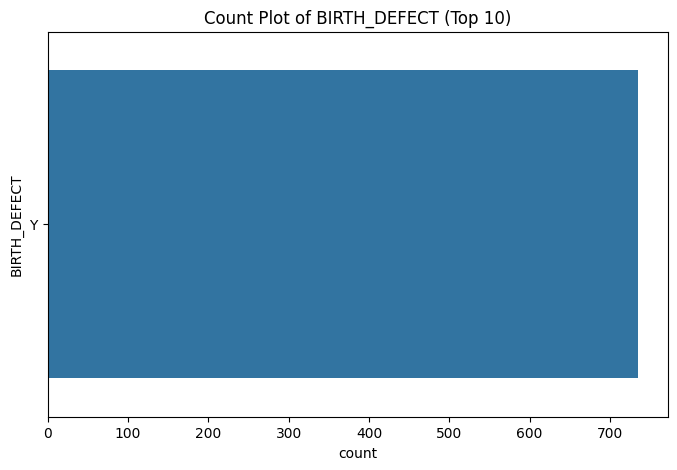


Value Counts for OFC_VISIT (Top 10):
OFC_VISIT
Y    244456
Name: count, dtype: int64


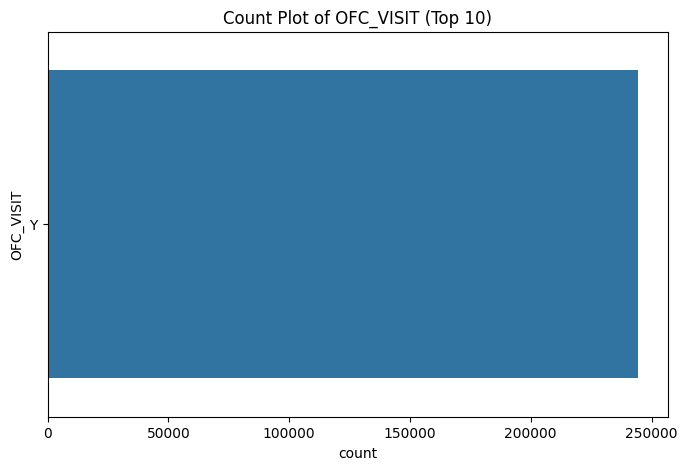


Value Counts for ER_ED_VISIT (Top 10):
ER_ED_VISIT
Y    140782
Name: count, dtype: int64


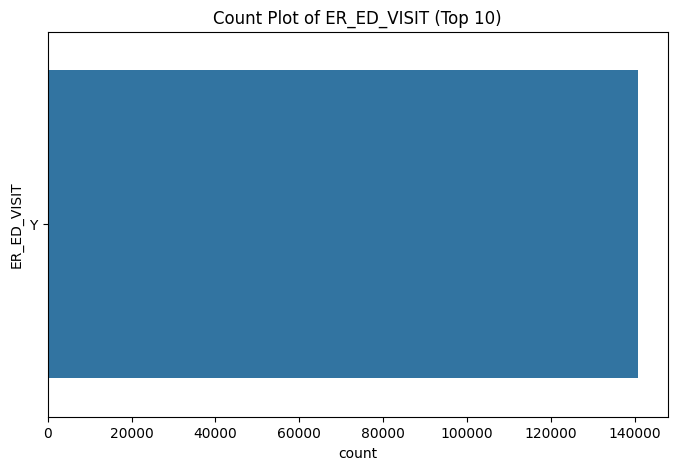


Value Counts for ALLERGIES (Top 10):
ALLERGIES
none          47073
NKDA          18041
NKA           17550
No            12595
Penicillin    11897
NONE           7286
no             6787
Sulfa          5887
Unknown        5416
unknown        5266
Name: count, dtype: int64


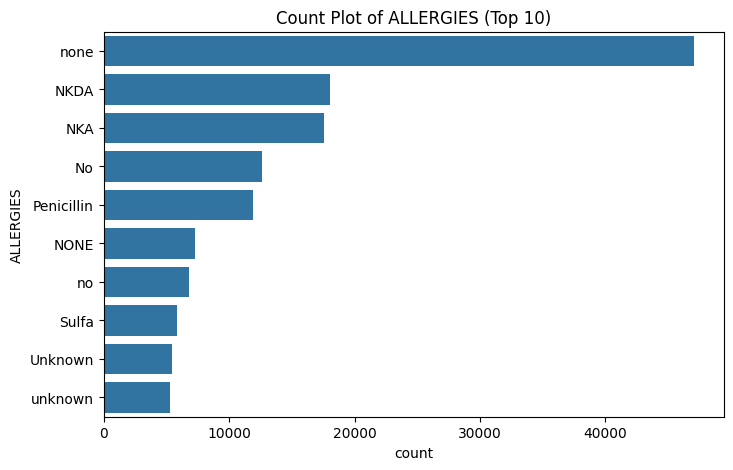

In [23]:
# 6. Categorical Data (top 10 values only)
categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col} (Top 10):")
    top_10 = merged_df[col].value_counts().head(10)
    print(top_10)
    plt.figure(figsize=(8, 5))
    sns.countplot(y=merged_df[col], order=top_10.index)
    plt.title(f"Count Plot of {col} (Top 10)")
    plt.show()

In [25]:
merged_df.count()

VAERS_ID        1250586
RECVDATE        1250586
STATE           1043638
AGE_YRS         1085682
CAGE_YR          969625
CAGE_MO           23681
SEX             1248653
RPT_DATE           2467
SYMPTOM_TEXT    1248537
DIED              21682
DATEDIED          18965
L_THREAT          18481
ER_VISIT            421
HOSPITAL         101760
HOSPDAYS          60271
X_STAY              657
DISABLE           24165
RECOVD          1098684
VAX_DATE        1135529
ONSET_DATE      1106499
NUMDAYS         1055053
LAB_DATA         377593
V_ADMINBY       1250586
V_FUNDBY           2653
OTHER_MEDS       558418
CUR_ILL          323487
HISTORY          569325
PRIOR_VAX         55955
SPLTTYPE         414563
FORM_VERS       1250586
TODAYS_DATE     1236402
BIRTH_DEFECT        735
OFC_VISIT        244456
ER_ED_VISIT      140782
ALLERGIES        450504
ORDER           1250586
dtype: int64